In [36]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np

import seaborn as sns
from matplotlib import pyplot as plt

import math
import env
import acquire
import prepare

url = f'mysql+pymysql://{env.user}:{env.password}@{env.host}/iris_db'
query = '''
SELECT * FROM measurements JOIN species USING(species_id);
'''

# Modeling
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

# Though the following import is not directly being used, it is required
# for 3D projection to work
from mpl_toolkits.mplot3d import Axes3D
iris = pd.read_sql(query, url)


#### 1.Use the iris dataset.

Perform clustering with sepal length, sepal width, and petal length.
Use a k of 4.
Create a 3d visualization that shows your clusters along with the features specified above?
Is 4 the optimal number? Try different values of k and visualize your results.

In [40]:
iris.head()

,species_id,measurement_id,sepal_length,sepal_width,petal_length,petal_width,species_name
0,1,1,5.1,3.5,1.4,0.2,setosa
1,1,2,4.9,3.0,1.4,0.2,setosa
2,1,3,4.7,3.2,1.3,0.2,setosa
3,1,4,4.6,3.1,1.5,0.2,setosa
4,1,5,5.0,3.6,1.4,0.2,setosa


In [8]:
iris=pd.DataFrame(iris)

In [13]:
X = iris[['sepal_length' , 'sepal_width', 'petal_length']]

In [26]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(X)

kmeans.predict(X)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 4, 0, 2, 4, 4, 4, 2, 4, 2, 2, 4, 2, 4, 2, 4,
       4, 2, 4, 2, 4, 2, 4, 4, 4, 4, 4, 0, 4, 2, 2, 2, 2, 4, 2, 4, 4, 4,
       2, 2, 2, 4, 2, 2, 2, 2, 2, 4, 2, 2, 0, 4, 3, 0, 0, 3, 2, 3, 0, 3,
       0, 0, 0, 4, 4, 0, 0, 3, 3, 4, 0, 4, 3, 4, 0, 3, 4, 4, 0, 3, 3, 3,
       0, 4, 0, 3, 0, 0, 4, 0, 0, 0, 4, 0, 0, 0, 4, 0, 0, 4], dtype=int32)

In [27]:
pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)\
    .reset_index()\
    .rename({'index': 'cluster'}, axis=1)\
    .set_index('cluster')

,sepal_length,sepal_width,petal_length
cluster,,,
0,6.577778,3.055556,5.455556
1,5.006000,3.428000,1.462000
2,5.508000,2.600000,3.908000
3,7.475000,3.125000,6.300000
4,6.144444,2.838889,4.722222


In [28]:
estimators = [('8 Clusters', KMeans(n_clusters=8)),
              ('3 Clusters', KMeans(n_clusters=3)),
              ('3 Clusters, bad hyperparam', KMeans(n_clusters=3, n_init=1, max_iter=1, init='random'))]

#### Create a 3d visualization that shows your clusters along with the features specified above?

Text(0.5, 0.92, 'Actual Species Clusters')

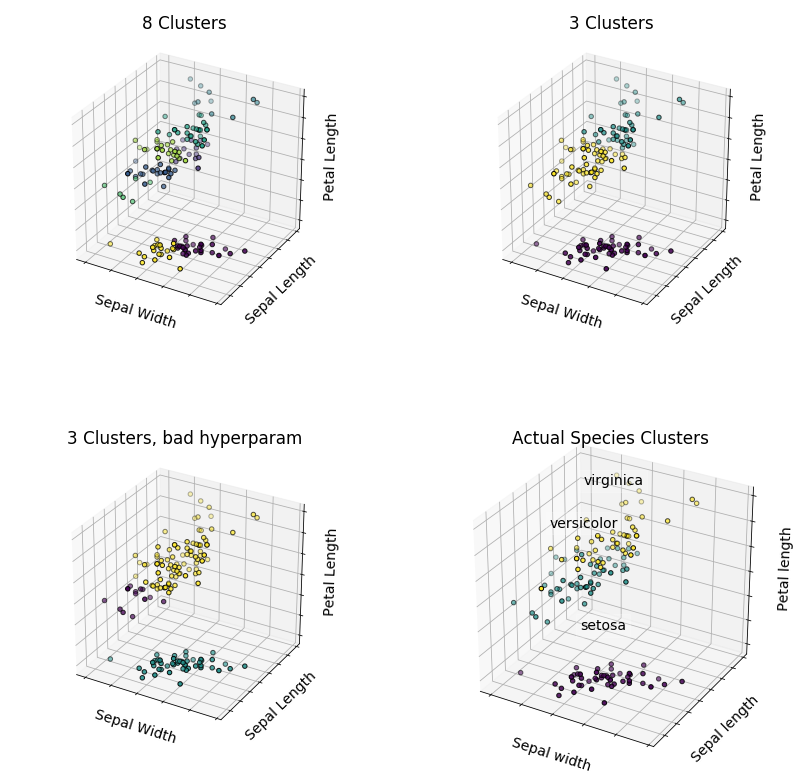

In [29]:
fig, axs = plt.subplots(2, 2, figsize=(14, 14), subplot_kw={'projection': '3d'})

for ax, (title, kmeans) in zip(axs.ravel(), estimators):
    # fit the model
    kmeans.fit(X)

    labels = kmeans.labels_

    # plot the points
    ax.scatter(X.sepal_width, X.sepal_length, X.petal_length,
               c=labels.astype(np.float), edgecolor='k')

    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])

    ax.set_xlabel('Sepal Width')
    ax.set_ylabel('Sepal Length')
    ax.set_zlabel('Petal Length')

    ax.set_title(title)
    ax.dist = 12

ax = axs.ravel()[-1]    

for species in iris.species_name.unique():
    df = iris[iris.species_name == species]
    x = df.sepal_width.mean()
    y = df.sepal_length.mean()
    z = df.petal_length.mean() + 2

    ax.text3D(x, y, z, species,
              horizontalalignment='center',
              bbox=dict(alpha=.2, edgecolor='w', facecolor='w'))

# add the actual data points
ax.scatter(X.sepal_width, X.sepal_length, X.petal_length, c=iris.species_id, edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

ax.set_xlabel('Sepal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
ax.set_title('Actual Species Clusters')

Use the mall dataset.

Perform clustering using annual income and spending score. Try out different values for k.
Use the resulting clusters to explore your data. What is the center point for each cluster in terms of annual income and spending score? What is the average age for each cluster?
Create a 3d plot with annual income, spending score, and age. Use color to distinguish the clusters you have created.

In [34]:
mall= acquire.get_mallcustomer_data()

In [35]:
mall.head()

,gender,age,annual_income,spending_score
customer_id,,,,
1,Male,19,15,39
2,Male,21,15,81
3,Female,20,16,6
4,Female,23,16,77
5,Female,31,17,40


In [38]:
mall=prepare.data_prep(mall, cols_to_remove=[], prop_required_column = .6, prop_required_row=.75)

In [39]:
df = mall.drop(columns='gender')

In [40]:
df.head()

,age,annual_income,spending_score
customer_id,,,
1,19,15,39
2,21,15,81
3,20,16,6
4,23,16,77
5,31,17,40


   k            sse
0  1  308812.780000
1  2  212840.169821
2  3  143342.751572
3  4  104366.151456
4  5   75350.779172
5  6   58300.443322
6  7   51118.949932
7  8   44342.317393
8  9   40891.393647


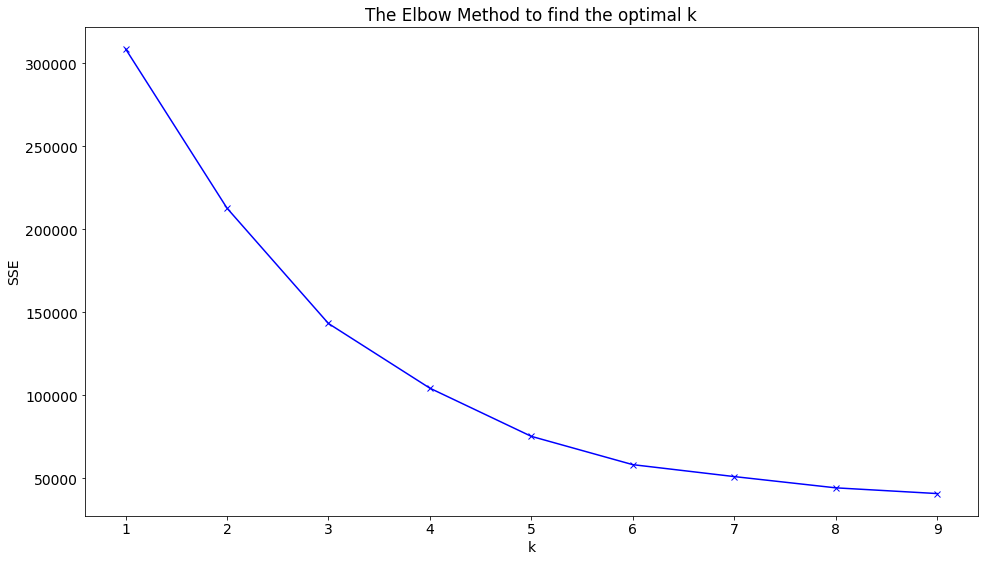

In [41]:
## elbow method, find optimal number of clusters
ks = range(1,10)
sse = []
for k in ks:
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df)

    # inertia: Sum of squared distances of samples to their closest cluster center.
    sse.append(kmeans.inertia_)

print(pd.DataFrame(dict(k=ks, sse=sse)))

plt.plot(ks, sse, 'bx-')
plt.xlabel('k')
plt.ylabel('SSE')
plt.title('The Elbow Method to find the optimal k')
plt.show()

In [44]:
###visualize what the clusters will look like using two possible values for K, 3 and 6.
estimators = [('3 Clusters', KMeans(n_clusters=3)),
              ('6 Clusters', KMeans(n_clusters=6))]

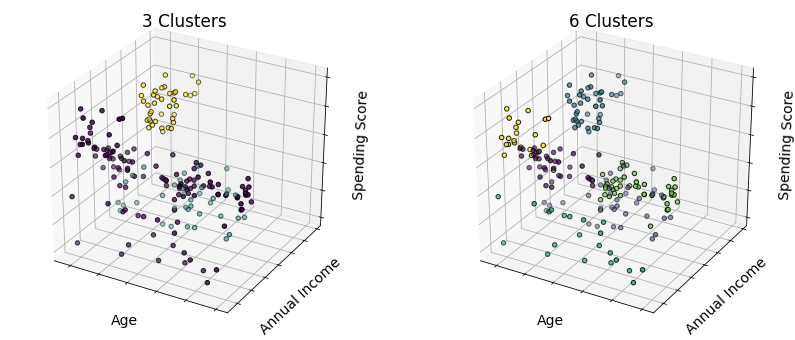

In [45]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6), subplot_kw={'projection': '3d'})

for ax, (title, kmeans) in zip(axs, estimators):
    # fit the kmeans object
    kmeans.fit(df)

    labels = kmeans.labels_

    ax.scatter(df.age, 
               df.annual_income, 
               df.spending_score,
               c=labels.astype(np.float), edgecolor='k')
    ax.set(xticklabels=[], yticklabels=[], zticklabels=[])
    ax.set(xlabel='Age', ylabel='Annual Income', zlabel='Spending Score')
    ax.set(title=title)

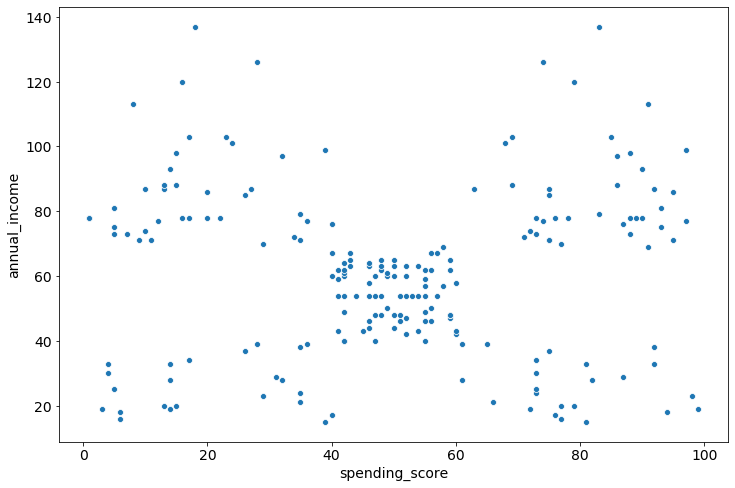

In [46]:
##

plt.figure(figsize=(12, 8))
sns.scatterplot(df.spending_score, df.annual_income)
